In [1]:
from math import sin, cos, log, ceil
import numpy
from matplotlib import pyplot
%matplotlib inline
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16

In [44]:
g = 9.8
v_t = 4.9
C_D = 1/5
C_L = 1

v0 = v_t
theta0 = 0.5
x0 = 0
y0 = 2

In [40]:
def f(u):
    v, theta, x, y = u
    return numpy.array([-g*sin(theta) - C_D/C_L*g/v_t**2*v**2,
                        -g*cos(theta)/v + g/v_t**2*v,
                        v*cos(theta),
                        v*sin(theta)])

def euler_step(u,f,dt):
    return u + dt*f(u)

In [55]:
T =4
dt = 0.01
N = int(T/dt) + 1
t = numpy.linspace(0,T,N)

u= numpy.zeros((N,4))
u[0] = numpy.array([v0,theta0,x0,y0])

for n in range(N-1):
    u[n+1] = euler_step(u[n],f,dt)
    if u[n+1,3]<= 0 :
        break

In [52]:
x = u[u[:,3]>0,2]
y = u[u[:,3]>0,3]

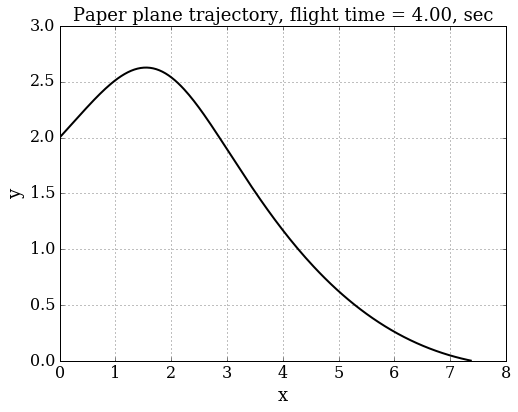

In [53]:
pyplot.figure(figsize=(8,6))
pyplot.grid(True)
pyplot.xlabel(r'x',fontsize = 18)
pyplot.ylabel(r'y',fontsize = 18)
pyplot.title('Paper plane trajectory, flight time = %.2f, sec' % T, fontsize = 18)
pyplot.plot(x,y,'k-',lw=2);